In [1]:

import numpy as np
import matplotlib.pyplot as plt


# Problem 1 


In [2]:
print("Problem 1")

def simps(f, a, b, N=50):
    if N % 2 == 1:
        raise ValueError("N must be an even integer.")
    dx = (b-a)/N
    x = np.linspace(a, b, N+1)
    y = f(x)
    S = dx/3 * np.sum(y[0:-1:2] + 4*y[1::2] + y[2::2])
    return S

def errorf(N, K):
    return K/(180*N**4)

# 함수와 exact한 값 설정
f4 = lambda x : (-96*x**4+96*(1+x**2)*x**2-12*(1+x**2)**2)/(1+x**2)**4  ## f^(4)
g = lambda x: np.log(1+x**2) ## Integrand
exact = np.pi/2 - 2 + np.log(2)  #exact value 
error = 1e-8 ## error 
K4 = np.abs(f4(np.linspace(0, 1, 10000))).max()    

for n in range(2, 10000000000000, 2):
    errorn = errorf(n, K4)
    if errorn <= error:
        least = n
        break

print("Theoretical number is {}".format(least))
approx = simps(g, 0, 1, least)   ## least 만큼 돌렸을 때의 approximation
err = np.abs(approx - exact)   ## err 계산
print("estimiation with {error} is {value}".format(error = error, value = err < error))

for i in range(2, least, 2):
    approx = simps(g, 0, 1, i)
    err = np.abs(approx - exact)
    if err < 1e-8:
        print("Least number of iteration to satisfy error is {}".format(i))
        break
print("---------------------------")


Problem 1
Theoretical number is 52
estimiation with 1e-08 is True
Least number of iteration to satisfy error is 28
---------------------------


#  Problem 2 


Problem 2


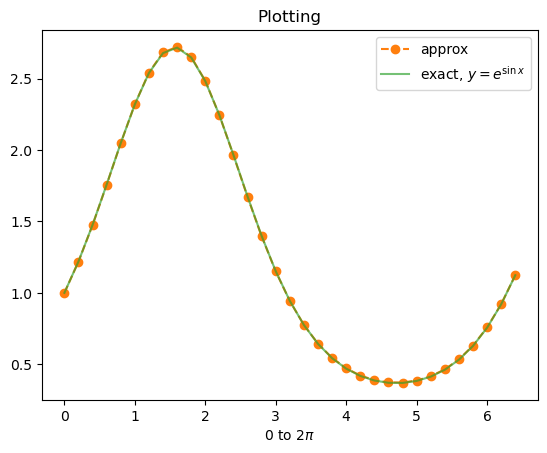

In [3]:
print("Problem 2")
exact2 = lambda x : np.exp(np.sin(x))
u = lambda t, y : y*np.cos(t)

# Define function
def odeMid(f, h, y0):
    grid = np.arange(0, 2*np.pi + h, h)
    y = np.zeros_like(grid)
    y[0]=y0
    for i in range(grid.size-1):
        k1 = f(grid[i], y[i])
        k2 = f(grid[i] + 0.5*h, y[i] + k1*0.5*h)
        y[i+1] = y[i] + k2*h
    return grid, y

#결과값
x, y = odeMid(u, 0.2, 1)

#plotting
plt.plot(x, y, 'o--', c="C1" , label = 'approx')
plt.plot(x, exact2(x), label='exact, $y=e^{\sin{x}}$', alpha=0.65, c="C2")
plt.legend()
plt.title('Plotting')
plt.xlabel("0 to $2\pi$")
plt.show()
